In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
de_f = pd.read_csv(r"data.csv")
de_f.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
de_f.shape

(150, 6)

In [5]:
de_f.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
de_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
de_f.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
de_f.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
de_f['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

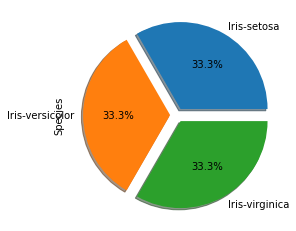

In [10]:
de_f['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode =[0.08,0.08,0.08]) 

In [11]:
de_f.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


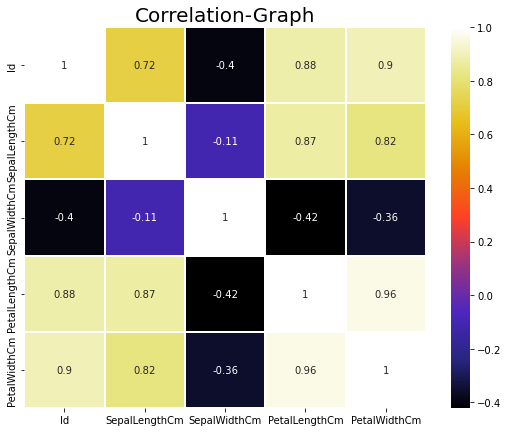

In [12]:
plt.figure(figsize=(9,7))
sns.heatmap(de_f.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation-Graph",size=20)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
laEn = LabelEncoder()
de_f['Species'] = laEn.fit_transform(de_f['Species'])
de_f.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
de_f['Species'].unique()

array([0, 1, 2])

In [15]:

from sklearn.model_selection import train_test_split
ftr = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = de_f.loc[:, ftr].values   
Y = de_f.Species
XTrainer, XTester, YTrainer, YTester = train_test_split(X, Y, test_size = 40,random_state=0)

In [16]:
XTrainer.shape

(110, 4)

In [17]:
XTester.shape

(40, 4)

In [18]:
YTrainer.shape

(110,)

In [19]:
YTester.shape

(40,)

In [20]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
XTrainer = stdsc.fit_transform(XTrainer)
XTester = stdsc.transform(XTester)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

In [21]:
from sklearn.linear_model import LogisticRegression
logmdl= LogisticRegression(random_state = 0)
logmdl.fit(XTrainer, YTrainer)
logmdl.fit(XTrainer, YTrainer)
YP_res=logmdl.predict(XTester)

In [22]:
YP_res

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [23]:
print("Accuracy:",metrics.accuracy_score(YTester, YP_res)*100)

Accuracy: 97.5


In [24]:
print(classification_report(YTester, YP_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [25]:
confusion_matrix(YTester,YP_res )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knnmdl = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')
from sklearn.neighbors import KNeighborsClassifier
knnmdl = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnmdl.fit(XTrainer, YTrainer)
YP_knn=knnmdl.predict(XTester)

In [27]:
logmdl.fit(XTrainer, YTrainer)

LogisticRegression(random_state=0)

In [28]:
logmdl.fit(XTrainer, YTrainer)

LogisticRegression(random_state=0)

In [29]:
print("Accuracy:",metrics.accuracy_score(YTester,YP_knn)*100)

Accuracy: 97.5


In [30]:
print(classification_report(YTester,YP_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [32]:
confusion_matrix(YTester, YP_knn)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)
dtree.fit(XTrainer, YTrainer)
YP_dtr=dtree.predict(XTester)

In [34]:
YP_dtr

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [35]:

print("Accuracy:",metrics.accuracy_score(YTester, YP_dtr)*100)

Accuracy: 97.5


In [36]:
print(classification_report(YTester, YP_dtr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [37]:
confusion_matrix(YTester, YP_dtr)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

In [38]:
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()

nvb.fit(XTrainer, YTrainer)


YP_nvb=nvb.predict(XTester)

In [39]:
YP_nvb

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [40]:
print("Accuracy:",metrics.accuracy_score(YTester, YP_nvb)*100)

Accuracy: 100.0


In [41]:
print(classification_report(YTester, YP_nvb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [42]:
confusion_matrix(YTester,YP_nvb )

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]], dtype=int64)

In [43]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
Rforest.fit(XTrainer, YTrainer)
YP_rf=Rforest.predict(XTester)

In [44]:
YP_rf

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [45]:
print("Accuracy:",metrics.accuracy_score(YTester,YP_rf)*100)

Accuracy: 95.0


In [46]:
print(classification_report(YTester, YP_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.89      0.89      0.89         9

    accuracy                           0.95        40
   macro avg       0.94      0.94      0.94        40
weighted avg       0.95      0.95      0.95        40



In [47]:
confusion_matrix(YTester,YP_rf )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1,  8]], dtype=int64)

In [48]:
from sklearn.svm import SVC
svm_model=SVC(C=500, kernel='rbf')
svm_model.fit(XTrainer, YTrainer)
YP_svm=svm_model.predict(XTester)

In [49]:
YP_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [50]:
print("Accuracy:",metrics.accuracy_score(YTester,YP_svm)*100)

Accuracy: 97.5


In [51]:
print(classification_report(YTester, YP_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [52]:
confusion_matrix(YTester,YP_svm )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

In [53]:
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(YTester, YP_res)*100)
print("Accuracy of KNN Model:",metrics.accuracy_score(YTester,YP_knn)*100)
print("Accuracy of Decision Tree Model:",metrics.accuracy_score(YTester, YP_dtr)*100)
print("Accuracy of Naive Bayes Model:",metrics.accuracy_score(YTester, YP_nvb)*100)
print("Accuracy of Random Forest Classification Model:",metrics.accuracy_score(YTester,YP_rf)*100)
print("Accuracy of SVM Model:",metrics.accuracy_score(YTester,YP_svm)*100)

Accuracy of Logistic Regression Model: 97.5
Accuracy of KNN Model: 97.5
Accuracy of Decision Tree Model: 97.5
Accuracy of Naive Bayes Model: 100.0
Accuracy of Random Forest Classification Model: 95.0
Accuracy of SVM Model: 97.5


CONCLUSION

We have successfully completed a project on "Iris Flower Classification".